# TP1: Le problème d'apprentissage

**IFT6390 - Fondements de l'apprentissage machine**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pierrelux/mlbook/blob/main/exercises/tp1_learning_problem.ipynb)

Ce notebook accompagne le [Chapitre 2: Le problème d'apprentissage](https://pierrelux.github.io/mlbook/learning-problem).

## Objectifs

À la fin de ce TP, vous serez en mesure de:
- Calculer l'erreur quadratique moyenne (MSE)
- Observer le phénomène de surapprentissage avec des polynômes
- Comprendre le compromis biais-variance
- Implémenter la régularisation Ridge

---

## Partie 0: Configuration

Exécutez cette cellule pour importer les bibliothèques nécessaires.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', message='Polyfit may be poorly conditioned')

# Pour de jolis graphiques
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12

print("Configuration terminee!")

Configuration terminee!


## Partie 1: Les données de freinage

Nous utilisons les données classiques d'Ezekiel (1930): la distance de freinage d'un véhicule en fonction de sa vitesse.

**Question préliminaire**: Quelle relation attendez-vous entre vitesse et distance de freinage? Linéaire? Quadratique? Autre?

In [2]:
# Données de freinage (Ezekiel, 1930): vitesse (mph) vs distance d'arrêt (ft)
speed = np.array([4, 4, 7, 7, 8, 9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14,
                  14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19,
                  20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25], dtype=float)
dist = np.array([2, 10, 4, 22, 16, 10, 18, 26, 34, 17, 28, 14, 20, 24, 28, 26, 34, 34, 46,
                 26, 36, 60, 80, 20, 26, 54, 32, 40, 32, 40, 50, 42, 56, 76, 84, 36, 46,
                 68, 32, 48, 52, 56, 64, 66, 54, 70, 92, 93, 120, 85], dtype=float)

print(f"Nombre d'observations: {len(speed)}")
print(f"Vitesse: min={speed.min():.0f}, max={speed.max():.0f} mph")
print(f"Distance: min={dist.min():.0f}, max={dist.max():.0f} ft")

Nombre d'observations: 50
Vitesse: min=4, max=25 mph
Distance: min=2, max=120 ft


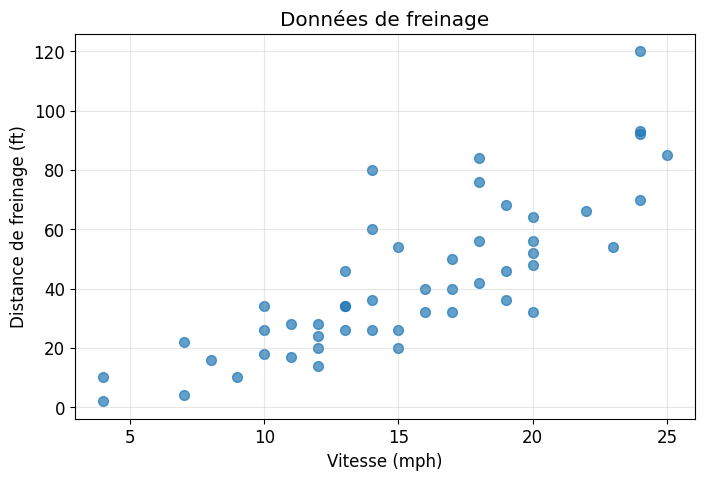

In [3]:
# Visualisation des données
plt.figure(figsize=(8, 5))
plt.scatter(speed, dist, alpha=0.7, s=50)
plt.xlabel('Vitesse (mph)')
plt.ylabel('Distance de freinage (ft)')
plt.title('Données de freinage')
plt.grid(True, alpha=0.3)
plt.show()

---
## Partie 2: Ajuster un polynôme

Nous allons ajuster des polynômes de différents degrés aux données.

### 2.1 Ajustement simple

In [16]:
# Ajuster un polynôme de degré 2
degree = 2
coeffs = np.polyfit(speed, dist, degree)

print(f"Coefficients du polynôme de degré {degree}:")
for i, c in enumerate(coeffs):
    print(f"  coefficient de x^{degree-i}: {c:.4f}")

Coefficients du polynôme de degré 2:
  coefficient de x^2: 0.1000
  coefficient de x^1: 0.9133
  coefficient de x^0: 2.4701


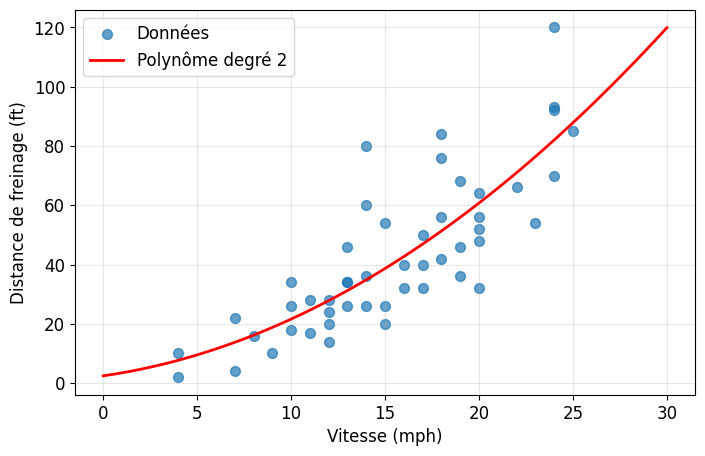

In [17]:
# Visualiser l'ajustement
plt.figure(figsize=(8, 5))
plt.scatter(speed, dist, alpha=0.7, s=50, label='Données')

# Grille pour tracer la courbe
speed_grid = np.linspace(0, 30, 100)
dist_pred = np.polyval(coeffs, speed_grid)
plt.plot(speed_grid, dist_pred, 'r-', linewidth=2, label=f'Polynôme degré {degree}')

plt.xlabel('Vitesse (mph)')
plt.ylabel('Distance de freinage (ft)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Exercice 1: Calculer l'erreur quadratique moyenne (MSE)

L'erreur quadratique moyenne est définie comme:

$$\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$

**Complétez la fonction ci-dessous:**

In [18]:
def compute_mse(y_true, y_pred):
    """
    Calcule l'erreur quadratique moyenne.

    Args:
        y_true: valeurs réelles (array)
        y_pred: prédictions (array)

    Returns:
        MSE (float)
    """
    # ============================================
    # TODO: Complétez cette fonction
    # Indice: utilisez np.mean() et l'opérateur **2
    # ============================================

    mse = np.mean((y_true - y_pred)**2 ) # <- Remplacez None par votre code

    return mse

In [19]:
# Test de votre fonction
predictions = np.polyval(coeffs, speed)
mse = compute_mse(dist, predictions)

if mse is not None:
    print(f"MSE pour le polynôme de degré {degree}: {mse:.2f}")

    # Vérification
    expected_mse = np.mean((dist - predictions)**2)
    if np.isclose(mse, expected_mse):
        print("Correct!")
    else:
        print(f"Attendu: {expected_mse:.2f}")
else:
    print("La fonction retourne None. Completez le code!")

MSE pour le polynôme de degré 2: 216.49
Correct!


<details>
<summary>Cliquez pour voir la solution</summary>

```python
def compute_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse
```
</details>

### Exercice 2: Explorer differents degres

**Modifiez la variable `degree` ci-dessous et observez:**
- Comment change la courbe?
- Comment change le MSE?

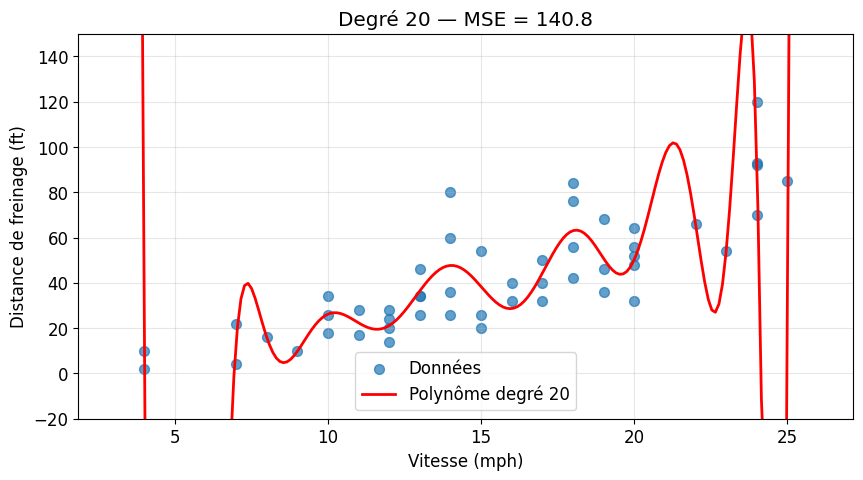


MSE: 140.77


In [26]:
# ============================================
# TODO: Essayez différentes valeurs: 1, 2, 5, 10, 15, 20
# ============================================
degree = 20  # <- Modifiez cette valeur!

# Ajustement
coeffs = np.polyfit(speed, dist, degree)
predictions = np.polyval(coeffs, speed)
mse = np.mean((dist - predictions)**2)

# Visualisation
plt.figure(figsize=(10, 5))
plt.scatter(speed, dist, alpha=0.7, s=50, label='Données')

speed_grid = np.linspace(3, 26, 200)
pred_grid = np.polyval(coeffs, speed_grid)
pred_grid = np.clip(pred_grid, -50, 200)  # Limiter pour la visualisation

plt.plot(speed_grid, pred_grid, 'r-', linewidth=2, label=f'Polynôme degré {degree}')
plt.xlabel('Vitesse (mph)')
plt.ylabel('Distance de freinage (ft)')
plt.title(f'Degré {degree} — MSE = {mse:.1f}')
plt.legend()
plt.ylim(-20, 150)
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nMSE: {mse:.2f}")

**Questions de reflexion:**
1. Quel degré donne le MSE le plus bas?
2. Le polynôme de degré 20 semble-t-il raisonnable pour prédire à de nouvelles vitesses?
3. C'est quoi le problème avec minimiser uniquement le MSE sur les données d'entraînement?

---
## Partie 3: Train/Test Split — Le surapprentissage

Pour détecter le **surapprentissage**, nous séparons les données en:
- **Ensemble d'entraînement** (70%): pour ajuster le modèle
- **Ensemble de test** (30%): pour évaluer la généralisation

In [27]:
# Séparation train/test
np.random.seed(42)  # Pour reproductibilité
indices = np.random.permutation(len(speed))
n_train = 35

train_idx = indices[:n_train]
test_idx = indices[n_train:]

speed_train, dist_train = speed[train_idx], dist[train_idx]
speed_test, dist_test = speed[test_idx], dist[test_idx]

print(f"Entraînement: {len(speed_train)} exemples")
print(f"Test: {len(speed_test)} exemples")

Entraînement: 35 exemples
Test: 15 exemples


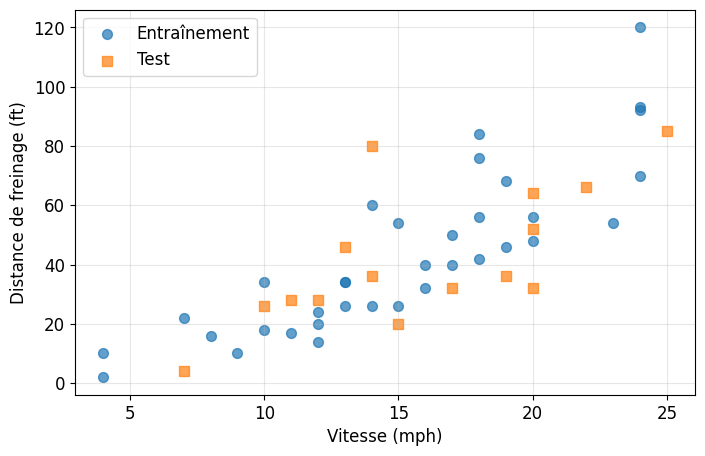

In [28]:
# Visualisation de la séparation
plt.figure(figsize=(8, 5))
plt.scatter(speed_train, dist_train, alpha=0.7, s=50, label='Entraînement')
plt.scatter(speed_test, dist_test, alpha=0.7, s=50, marker='s', label='Test')
plt.xlabel('Vitesse (mph)')
plt.ylabel('Distance de freinage (ft)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Exercice 3: Courbe biais-variance

**Complétez le code pour calculer l'erreur sur train ET test pour chaque degré:**

In [31]:
degrees = range(1, 16)
train_errors = []
test_errors = []

for deg in degrees:
    # Ajuster sur l'ensemble d'entraînement
    coeffs = np.polyfit(speed_train, dist_train, deg)

    # ============================================
    # TODO: Calculez les prédictions et erreurs
    # ============================================

    # Prédictions sur train
    pred_train = np.polyval(coeffs, speed_train)  # <- Complétez avec np.polyval(...)

    # Prédictions sur test
    pred_test = np.polyval(coeffs, speed_test)  # <- Complétez avec np.polyval(...)

    # MSE sur train
    mse_train = compute_mse(pred_train, dist_train)  # <- Complétez

    # MSE sur test
    mse_test = compute_mse(pred_test, dist_test)  # <- Complétez

    train_errors.append(mse_train)
    test_errors.append(mse_test)

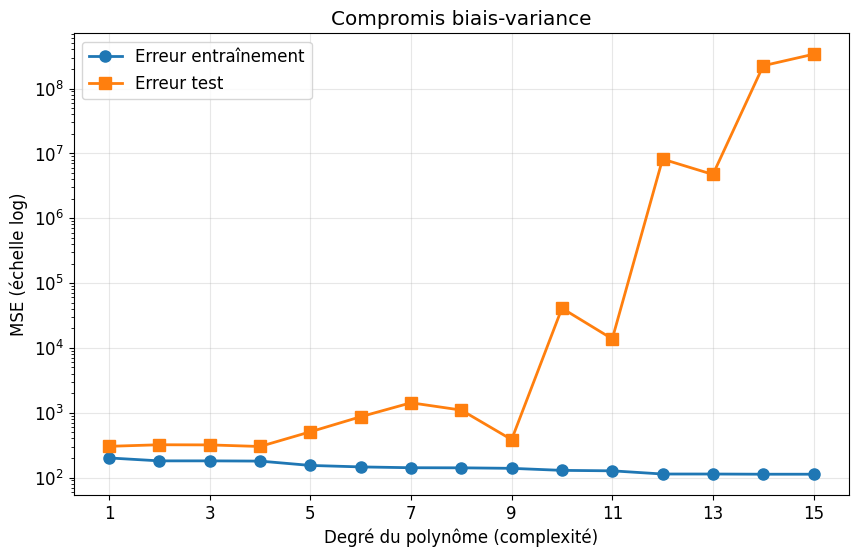


Meilleur degre (selon erreur test): 4
   MSE train: 179.2
   MSE test: 301.1


In [32]:
# Visualisation (exécutez après avoir complété le code ci-dessus)
if None not in train_errors and None not in test_errors:
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, train_errors, 'o-', linewidth=2, markersize=8, label='Erreur entraînement')
    plt.plot(degrees, test_errors, 's-', linewidth=2, markersize=8, label='Erreur test')
    plt.yscale('log')
    plt.xlabel('Degré du polynôme (complexité)')
    plt.ylabel('MSE (échelle log)')
    plt.title('Compromis biais-variance')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, 16, 2))
    plt.show()

    # Trouver le meilleur degré
    best_deg = degrees[np.argmin(test_errors)]
    print(f"\nMeilleur degre (selon erreur test): {best_deg}")
    print(f"   MSE train: {train_errors[best_deg-1]:.1f}")
    print(f"   MSE test: {test_errors[best_deg-1]:.1f}")
else:
    print("Completez le code de l'exercice 3!")

<details>
<summary>Cliquez pour voir la solution</summary>

```python
# Prédictions sur train
pred_train = np.polyval(coeffs, speed_train)

# Prédictions sur test
pred_test = np.polyval(coeffs, speed_test)

# MSE sur train
mse_train = np.mean((dist_train - pred_train)**2)

# MSE sur test
mse_test = np.mean((dist_test - pred_test)**2)
```
</details>

---
## Partie 4: Régularisation Ridge

Au lieu de choisir un degré bas, on peut utiliser un polynôme de **haut degré** avec **régularisation**.

La régularisation Ridge ajoute une pénalité sur les coefficients:

$$\hat{\boldsymbol{\theta}}_{\text{Ridge}} = \arg\min_{\boldsymbol{\theta}} \left[ \sum_{i=1}^{N} (y_i - \boldsymbol{\theta}^\top \mathbf{x}_i)^2 + \lambda \|\boldsymbol{\theta}\|^2 \right]$$

La solution en forme fermée est:

$$\hat{\boldsymbol{\theta}}_{\text{Ridge}} = (\mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^\top \mathbf{y}$$

### Exercice 4: Implementer Ridge Regression

**Completez la fonction ci-dessous:**

In [ ]:
(X @ c - y).T @ (X @ c - y) + lambda * c.T @ c
2 * X.T @ (X @ c - y) + 2 * lambda * c = 0
2 * X.T @ X @ c - 2 * X.T y + 2 * lambda * c =
2 * (X.T @ X - lambda * I) @ c = 2 * X.T @ y
(X.T @ X + lambda * I) @ c = X.T @ y
c = (X.T @ X + lambda * I)^(-1) @ X.T @ y

In [33]:
(np.random.randn(2) + 10).reshape(-1,1)**np.arange(5)

array([[1.00000000e+00, 9.85978150e+00, 9.72152913e+01, 9.58521531e+02,
        9.45081286e+03],
       [1.00000000e+00, 9.96680660e+00, 9.93372338e+01, 9.90074997e+02,
        9.86788602e+03]])

In [34]:
def polynomial_features(x, degree):
    """
    Crée la matrice de caractéristiques polynomiales.

    Args:
        x: vecteur d'entrées (n,)
        degree: degré du polynôme

    Returns:
        X: matrice (n, degree+1) avec colonnes [1, x, x², ..., x^degree]
    """
    n = len(x)
    X = np.zeros((n, degree + 1))
    for d in range(degree + 1):
        X[:, d] = x ** d
    return X


def ridge_regression(X, y, lambda_reg):
    """
    Calcule les coefficients Ridge.

    Args:
        X: matrice de features (n, d)
        y: vecteur cible (n,)
        lambda_reg: coefficient de régularisation

    Returns:
        theta: coefficients (d,)
    """
    # ============================================
    # TODO: Implémentez la formule Ridge
    # theta = (X'X + lambda*I)^(-1) X'y
    #
    # Indices:
    # - X.T pour la transposée
    # - @ pour le produit matriciel
    # - np.eye(n) pour la matrice identité n×n
    # - np.linalg.inv() pour l'inverse
    # ============================================

    d = X.shape[1]  # nombre de features

    theta =np.linalg.inv( (X.T @ X) + lambda_reg * np.eye(d)) @ (X.T @ y)# <- Remplacez par votre code

    return theta

In [35]:
# Test de votre implémentation
degree = 10
lambda_reg = 1.0

X_train = polynomial_features(speed_train, degree)
theta = ridge_regression(X_train, dist_train, lambda_reg)

if theta is not None:
    print(f"Coefficients Ridge (degré={degree}, λ={lambda_reg}):")
    print(f"  Norme des coefficients: {np.linalg.norm(theta):.2f}")

    # Prédictions
    X_test = polynomial_features(speed_test, degree)
    pred_test = X_test @ theta
    mse = np.mean((dist_test - pred_test)**2)
    print(f"  MSE test: {mse:.1f}")
    print("\nImplementation correcte!")
else:
    print("Completez la fonction ridge_regression!")

Coefficients Ridge (degré=10, λ=1.0):
  Norme des coefficients: 3.93
  MSE test: 1059.6

Implementation correcte!


<details>
<summary>Cliquez pour voir la solution</summary>

```python
def ridge_regression(X, y, lambda_reg):
    d = X.shape[1]
    I = np.eye(d)
    theta = np.linalg.inv(X.T @ X + lambda_reg * I) @ X.T @ y
    return theta
```
</details>

### Exercice 5: Trouver le meilleur lambda

**Explorez différentes valeurs de λ pour un polynôme de degré 10:**

In [36]:
degree = 10
X_train = polynomial_features(speed_train, degree)
X_test = polynomial_features(speed_test, degree)

lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []

print(f"{'λ':>10} | {'MSE Train':>10} | {'MSE Test':>10} | {'||θ||':>10}")
print("-" * 50)

for lam in lambdas:
    theta = ridge_regression(X_train, dist_train, lam)
    if theta is not None:
        mse_train = np.mean((dist_train - X_train @ theta)**2)
        mse_test = np.mean((dist_test - X_test @ theta)**2)
        norm_theta = np.linalg.norm(theta)
        results.append((lam, mse_train, mse_test, norm_theta))
        print(f"{lam:>10.3f} | {mse_train:>10.1f} | {mse_test:>10.1f} | {norm_theta:>10.1f}")

         λ |  MSE Train |   MSE Test |      ||θ||
--------------------------------------------------
     0.000 |     2464.6 |     8358.1 |     7323.1
     0.001 |      138.9 |      399.6 |       72.5
     0.010 |      139.5 |      375.6 |       39.0
     0.100 |      139.8 |      548.1 |       20.3
     1.000 |      142.5 |     1059.6 |        3.9
    10.000 |      143.2 |     1232.9 |        0.6
   100.000 |      143.4 |     1378.6 |        0.2
  1000.000 |      143.6 |     1427.0 |        0.1


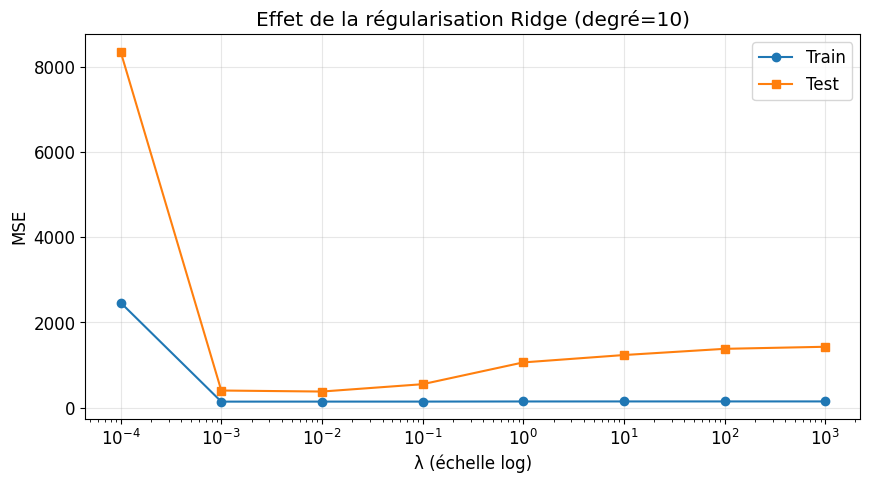

In [37]:
# Visualisation de l'effet de λ
if len(results) > 0:
    lambdas_plot = [r[0] for r in results]
    train_plot = [r[1] for r in results]
    test_plot = [r[2] for r in results]

    plt.figure(figsize=(10, 5))
    plt.semilogx([max(l, 1e-4) for l in lambdas_plot], train_plot, 'o-', label='Train')
    plt.semilogx([max(l, 1e-4) for l in lambdas_plot], test_plot, 's-', label='Test')
    plt.xlabel('λ (échelle log)')
    plt.ylabel('MSE')
    plt.title(f'Effet de la régularisation Ridge (degré={degree})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

**Questions:**
1. Quelle valeur de λ minimise l'erreur test?
2. Que se passe-t-il quand λ → 0? Et quand λ → ∞?
3. Comment la norme des coefficients ||θ|| change avec λ?

---
## Partie 5: SVD et la solution MCO

La **decomposition en valeurs singulieres** (SVD) offre une autre facon de comprendre les solutions MCO et Ridge. Cette section explore visuellement pourquoi Ridge fonctionne.

### Qu'est-ce que la SVD?

Toute matrice $\mathbf{X}$ peut s'ecrire:

$$\mathbf{X} = \mathbf{U} \mathbf{D} \mathbf{V}^\top$$

- $\mathbf{V}$: directions principales dans l'espace des features
- $\mathbf{D}$: valeurs singulieres $d_1 \geq d_2 \geq \cdots \geq d_p$ (amplitudes)
- $\mathbf{U}$: directions correspondantes dans l'espace des observations

In [38]:
# Creons des donnees 2D pour visualiser la SVD
np.random.seed(123)
n = 50

# Donnees avec correlation (une direction forte, une faible)
X_2d = np.random.randn(n, 2)
# Ajouter de la correlation
X_2d[:, 1] = 0.9 * X_2d[:, 0] + 0.3 * X_2d[:, 1]

# SVD
U, s, Vt = np.linalg.svd(X_2d, full_matrices=False)
V = Vt.T

print("Valeurs singulieres:")
print(f"  d1 = {s[0]:.2f} (direction forte)")
print(f"  d2 = {s[1]:.2f} (direction faible)")
print(f"  Ratio d1/d2 = {s[0]/s[1]:.1f}")

Valeurs singulieres:
  d1 = 11.22 (direction forte)
  d2 = 1.68 (direction faible)
  Ratio d1/d2 = 6.7


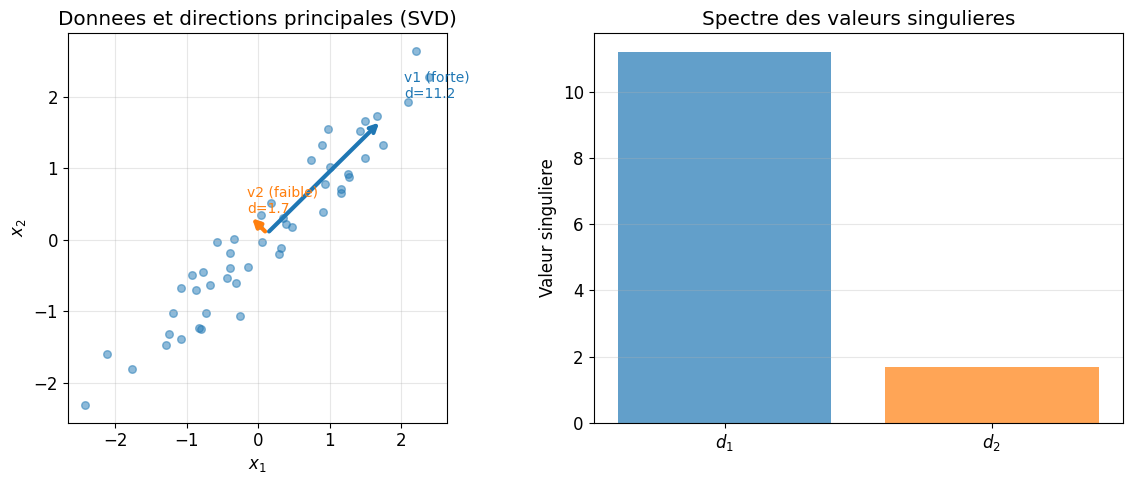

In [39]:
# Visualiser les directions principales
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gauche: donnees et directions principales
ax = axes[0]
ax.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.5, s=30)

# Tracer les directions principales (vecteurs propres de X'X)
origin = np.mean(X_2d, axis=0)
for i, (sv, color, label) in enumerate(zip(s, ['C0', 'C1'], ['v1 (forte)', 'v2 (faible)'])):
    direction = V[:, i] * sv / 5  # Echelle pour visualisation
    ax.annotate('', xy=origin + direction, xytext=origin,
                arrowprops=dict(arrowstyle='->', color=color, lw=3))
    ax.annotate(f'{label}\nd={sv:.1f}', xy=origin + direction * 1.2, fontsize=10, color=color)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Donnees et directions principales (SVD)')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

# Droite: valeurs singulieres
ax = axes[1]
ax.bar([1, 2], s, color=['C0', 'C1'], alpha=0.7)
ax.set_xticks([1, 2])
ax.set_xticklabels(['$d_1$', '$d_2$'])
ax.set_ylabel('Valeur singuliere')
ax.set_title('Spectre des valeurs singulieres')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Facteurs de retrecissement Ridge

La solution Ridge s'ecrit:

$$\hat{\boldsymbol{\theta}}_{\text{ridge}} = \sum_{j=1}^d \underbrace{\frac{d_j^2}{d_j^2 + \lambda}}_{\text{retrecissement}} \cdot \frac{\mathbf{u}_j^\top \mathbf{y}}{d_j} \cdot \mathbf{v}_j$$

Le facteur $\frac{d_j^2}{d_j^2 + \lambda}$ est toujours < 1, et il est **plus petit pour les directions faibles** (petit $d_j$).

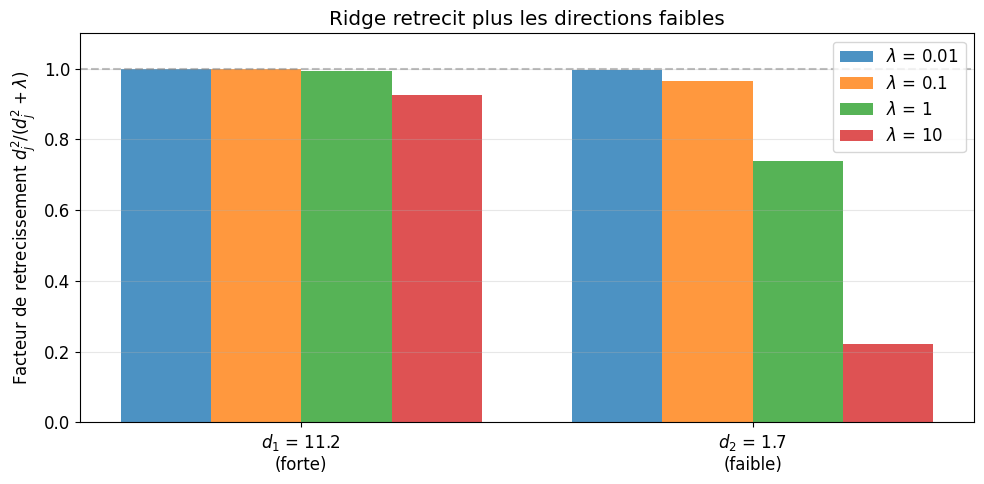


Observation: La direction faible (d2) est beaucoup plus retrecit que la direction forte (d1).
C'est exactement ce qu'on veut: reduire l'incertitude la ou elle est grande.


In [40]:
# Visualiser les facteurs de retrecissement
lambdas = [0.01, 0.1, 1, 10]
d_values = np.array([s[0], s[1]])  # Nos deux valeurs singulieres

fig, ax = plt.subplots(figsize=(10, 5))

x_pos = np.arange(len(d_values))
width = 0.2

for i, lam in enumerate(lambdas):
    shrinkage = d_values**2 / (d_values**2 + lam)
    bars = ax.bar(x_pos + i * width, shrinkage, width, label=f'$\\lambda$ = {lam}', alpha=0.8)

ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels([f'$d_1$ = {s[0]:.1f}\n(forte)', f'$d_2$ = {s[1]:.1f}\n(faible)'])
ax.set_ylabel('Facteur de retrecissement $d_j^2 / (d_j^2 + \\lambda)$')
ax.set_title('Ridge retrecit plus les directions faibles')
ax.legend()
ax.set_ylim(0, 1.1)
ax.axhline(1, color='gray', linestyle='--', alpha=0.5, label='MCO (pas de retrecissement)')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nObservation: La direction faible (d2) est beaucoup plus retrecit que la direction forte (d1).")
print("C'est exactement ce qu'on veut: reduire l'incertitude la ou elle est grande.")

**Question**: Pourquoi diviser par une petite valeur singuliere $d_j$ amplifie-t-il le bruit dans MCO?

---
## Partie 6: ERM comme integration de Monte Carlo

Le **risque** mesure la performance moyenne sur toutes les donnees possibles:

$$\mathcal{R}(f) = \mathbb{E}_{(\mathbf{X},Y) \sim p}[\ell(Y, f(\mathbf{X}))] = \int \ell(y, f(\mathbf{x})) \, p(\mathbf{x}, y) \, d\mathbf{x} \, dy$$

Probleme: cette integrale est **impossible a calculer** car:
1. On ne connait pas $p(\mathbf{x}, y)$
2. Meme si on la connaissait, l'integrale en haute dimension est intractable

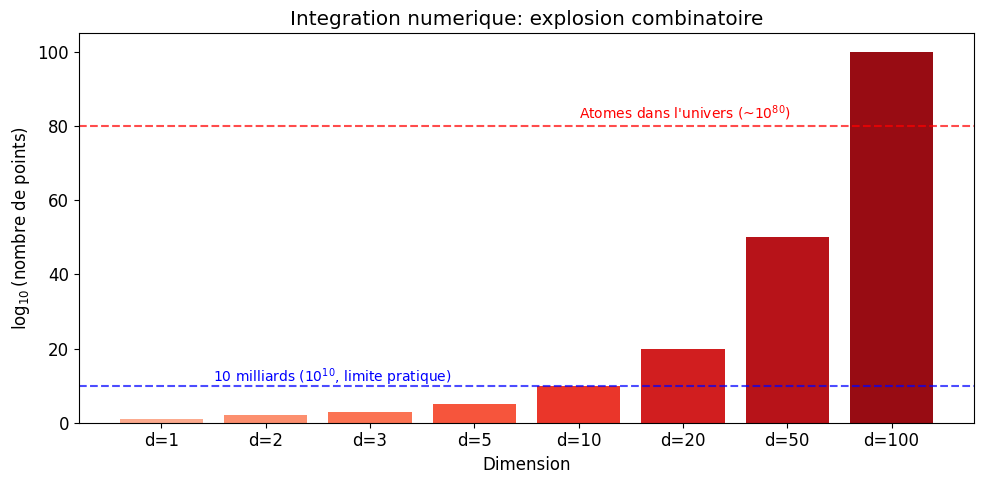


Avec seulement 10 points par dimension:
  d=10: 10^10 = 10 milliards de points
  d=100: 10^100 points (impossible!)


In [41]:
# La malediction de la dimensionnalite pour l'integration numerique
dimensions = [1, 2, 3, 5, 10, 20, 50, 100]
points_per_dim = 10  # 10 points par dimension pour une grille

# On trace log10 du nombre de points (evite les overflows)
log_grid_points = [d for d in dimensions]  # log10(10^d) = d

fig, ax = plt.subplots(figsize=(10, 5))

colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(dimensions)))
bars = ax.bar(range(len(dimensions)), log_grid_points, color=colors)

ax.set_xticks(range(len(dimensions)))
ax.set_xticklabels([f'd={d}' for d in dimensions])
ax.set_xlabel('Dimension')
ax.set_ylabel('$\\log_{10}$(nombre de points)')
ax.set_title('Integration numerique: explosion combinatoire')

# Annotations
ax.axhline(10, color='blue', linestyle='--', alpha=0.7)
ax.text(0.5, 11, '10 milliards ($10^{10}$, limite pratique)', color='blue', fontsize=10)

ax.axhline(80, color='red', linestyle='--', alpha=0.7)
ax.text(4, 82, 'Atomes dans l\'univers (~$10^{80}$)', color='red', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nAvec seulement 10 points par dimension:")
print(f"  d=10: 10^10 = 10 milliards de points")
print(f"  d=100: 10^100 points (impossible!)")

### La solution: Monte Carlo

Le **risque empirique** est une estimation Monte Carlo du vrai risque:

$$\hat{\mathcal{R}}(f) = \frac{1}{N} \sum_{i=1}^{N} \ell(y_i, f(\mathbf{x}_i))$$

| Methode | Complexite | Exigence |
|---------|------------|----------|
| Quadrature | $O(M^d)$ | Connaitre $p(\mathbf{x},y)$ |
| **Monte Carlo** | $O(N)$ | Avoir des echantillons |

La complexite Monte Carlo est **independante de la dimension**!

In [45]:
# Demonstration: Monte Carlo converge independamment de d
def true_integral_1d():
    """Integrale de x^2 sur [0,1] = 1/3"""
    return 1/3

def monte_carlo_estimate(n_samples, dim=1):
    """Estime E[||x||^2/d] pour x uniforme sur [0,1]^d"""
    # Pour x uniforme sur [0,1]^d, E[x_i^2] = 1/3 pour chaque composante
    # Donc E[||x||^2/d] = 1/3
    samples = np.random.uniform(0, 1, (n_samples, dim))
    return np.mean(np.sum(samples**2, axis=1) / dim)

# Comparer convergence pour differentes dimensions
np.random.seed(42)
n_values = [10, 50, 100, 500, 1000, 5000]
dims = [1, 10, 100]

fig, ax = plt.subplots(figsize=(10, 5))

true_value = 1/3

for dim in dims:
    errors = []
    for n in n_values:
        estimates = [monte_carlo_estimate(n, dim) for _ in range(50)]  # 50 repetitions
        errors.append(np.std(estimates))
    ax.loglog(n_values, errors, 'o-', label=f'd = {dim}', markersize=8)

# Ligne de reference: 1/sqrt(N)
n_ref = np.array(n_values)
ax.loglog(n_ref, 0.5 / np.sqrt(n_ref), 'k--', alpha=0.5, label='$1/\\sqrt{N}$')

ax.set_xlabel('Nombre d\'echantillons N')
ax.set_ylabel('Ecart-type de l\'estimation')
ax.set_title('Convergence Monte Carlo: independante de la dimension!')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservation: Les trois courbes se superposent!")
print("La precision Monte Carlo depend de N, pas de d.")

KeyboardInterrupt: 

**Question**: Pourquoi la complexite Monte Carlo est-elle $O(N)$ independamment de la dimension $d$?

**Reponse a reflechir**: Parce que chaque echantillon $(\mathbf{x}_i, y_i)$ contribue une evaluation de la perte, peu importe la dimension de $\mathbf{x}_i$. On ne discretise pas l'espace; on utilise les echantillons tels quels.

---
## Recapitulatif

Dans ce TP, vous avez appris:

1. **MSE**: L'erreur quadratique moyenne mesure la qualite des predictions

2. **Surapprentissage**: Un modele trop complexe memorise le bruit
   - Erreur train diminue mais erreur test augmente
   
3. **Compromis biais-variance**:
   - Modele simple = biais eleve (sous-apprentissage)
   - Modele complexe = variance elevee (surapprentissage)
   
4. **Regularisation Ridge**: Penalise les grands coefficients
   - Permet d'utiliser des modeles complexes sans surapprentissage
   - Lambda controle la force de la regularisation

5. **SVD et Ridge**: Ridge retrecit plus les directions faibles (petites valeurs singulieres)

6. **ERM = Monte Carlo**: Le risque empirique est une estimation Monte Carlo du vrai risque, avec complexite independante de la dimension

---

**Pour aller plus loin**: [Chapitre complet sur le site du cours](https://pierrelux.github.io/mlbook/learning-problem)